## Weighted Ridge Regression Optimization

We generate two highly correlated features X1 and X2 from a multli-variate normal distribution, we would like to implement the Ridge regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# Please try to use only these packages for computation

n = 1000
p = 2

mean = np.zeros((p))
val = 0.99
cov = np.ones((p,p))*val
cov = cov + np.eye(p)*(1-val)

np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, n)
theta_true = np.ones((p,1))



We first generate data based on $y=X\theta+e$, where $e$ follows $N(0,\Sigma)$, with $\delta=0.5$

In [2]:
delta=0.5
Sigma = np.eye(n,n,k=-1)*0.4 + np.eye(n,n)*1 + np.eye(n,n,k=1)*0.4
mean = np.zeros(n)
e = np.random.multivariate_normal(mean, Sigma, 1)

y=X@theta_true + delta*e.T

In [3]:
print(Sigma)

[[1.  0.4 0.  ... 0.  0.  0. ]
 [0.4 1.  0.4 ... 0.  0.  0. ]
 [0.  0.4 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.4 0. ]
 [0.  0.  0.  ... 0.4 1.  0.4]
 [0.  0.  0.  ... 0.  0.4 1. ]]


### Part 1: Analytical solution
(1) 1. Please derive the log likelihood function $l(\theta)$ of the weighted linear regression and implement in Python. 

In [4]:
lambda1 = 20
theta_ridge_est = np.linalg.solve(np.dot(np.dot(X.T, np.linalg.inv(Sigma)), X)+lambda1, np.dot(np.dot(X.T, np.linalg.inv(Sigma)), y))
print()
print(theta_ridge_est)



[[0.99094474]
 [0.97884959]]


### Part 2: Gradient Descent

(a) Please derive the gradient descent algorithm for the ridge regression problem for each iteration and write down for each iteration the way to update the coefficient $\theta$. 

In [15]:
def computeCost(X, y, lambda1, theta):

    y_cap = np.matmul(X,theta)
    diff  = y-y_cap
    norm  = np.linalg.norm(diff)
    cost  = norm**2/(y.size*1.0) + lambda1*(np.linalg.norm(theta))**2
    return cost

def computeGrad(X, y, lambda1, theta):

    y_cap    = np.matmul(X,theta)
    diff     = y-y_cap
    gradient = -2*np.dot(X.T,diff)/(y.size*1.0) + 2*lambda1*theta
    return gradient


(b) Let's use Gradient Descent to update parameter until convergence, please try different stepsize to see the Convergence performance. 

In [17]:
def gradientDescent(X, y, theta, lambda1, step_size, numIterations):

    theta_values = []
    loss_values  = []
    for i in range(0, numIterations):
        
        cost = computeCost(X, y, lambda1, theta)
        loss_values.append(float(cost))
        if i%20==0:
            print("Iteration %d ------ theta:[ %0.2f, %0.2f] ------ Cost: %0.5f " % (i, theta[0], theta[1], cost))
        
        gradient = computeGrad(X, y, lambda1, theta)
        theta    = theta - step_size*gradient
        theta_values.append(theta)
    
    print("\n final theta: [ %0.5f, %0.5f] \n"%(theta.flatten()[0],theta.flatten()[1]))
    return theta,theta_values,loss_values

numIterations=200

print()
step_size_1=0.002
init_theta=np.array([[0.5],[0.5]])
print("Gradient descent with %4d iterations. alpha=%6.5f and initial theta=[%0.2f,%0.2f]\n"%(numIterations,step_size_1,init_theta.flatten()[0],init_theta.flatten()[1]))
theta,theta_values,loss_values_1=gradientDescent(X, y, init_theta, lambda1, step_size_1, numIterations)


step_size_2=0.006
print("Gradient descent with %4d iterations. alpha=%6.5f and initial theta=[%0.2f,%0.2f]\n"%(numIterations,step_size_2,init_theta.flatten()[0],init_theta.flatten()[1]))
theta,theta_values,loss_values_2=gradientDescent(X, y, init_theta, lambda1,step_size_2, numIterations)


step_size_3=0.010
print("Gradient descent with %4d iterations. alpha=%6.5f and initial theta=[%0.2f,%0.2f]\n"%(numIterations,step_size_3,init_theta.flatten()[0],init_theta.flatten()[1]))
theta,theta_values,loss_values_3=gradientDescent(X, y, init_theta, lambda1,step_size_3, numIterations)


step_size_4=0.014
print("Gradient descent with %4d iterations. alpha=%6.5f and initial theta=[%0.2f,%0.2f]\n"%(numIterations,step_size_4,init_theta.flatten()[0],init_theta.flatten()[1]))
theta,theta_values,loss_values_4=gradientDescent(X, y, init_theta, lambda1,step_size_4, numIterations)


step_size_5=0.018
print("Gradient descent with %4d iterations. alpha=%6.5f and initial theta=[%0.2f,%0.2f]\n"%(numIterations,step_size_5,init_theta.flatten()[0],init_theta.flatten()[1]))
theta,theta_values,loss_values_5=gradientDescent(X, y, init_theta, lambda1,step_size_5, numIterations)


Gradient descent with  200 iterations. alpha=0.00200 and initial theta=[0.50,0.50]

Iteration 0 ------ theta:[ 0.50, 0.50] ------ Cost: 11.20397 
Iteration 20 ------ theta:[ 0.15, 0.15] ------ Cost: 3.91219 
Iteration 40 ------ theta:[ 0.10, 0.10] ------ Cost: 3.72549 
Iteration 60 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72071 
Iteration 80 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72058 
Iteration 100 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72058 
Iteration 120 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72058 
Iteration 140 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72058 
Iteration 160 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72058 
Iteration 180 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72058 

 final theta: [ 0.08656, 0.08653] 

Gradient descent with  200 iterations. alpha=0.00600 and initial theta=[0.50,0.50]

Iteration 0 ------ theta:[ 0.50, 0.50] ------ Cost: 11.20397 
Iteration 20 ------ theta:[ 0.09, 0.09] ------ Cost: 3.72062 
Iteration 40 ------ theta:[ 0.09, 0.09] -----

(c) Normally, it is good to visualize the loss function over time, please plot the loss (cost) function for theta in each iteration. 

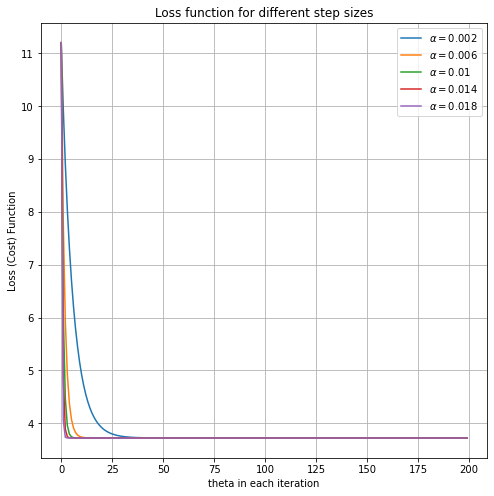

In [18]:
plt.rcParams['figure.figsize'] = [8,8]

plt.plot(loss_values_1,label=r'$\alpha=$'+str(step_size_1))
plt.plot(loss_values_2,label=r'$\alpha=$'+str(step_size_2))
plt.plot(loss_values_3,label=r'$\alpha=$'+str(step_size_3))
plt.plot(loss_values_4,label=r'$\alpha=$'+str(step_size_4))
plt.plot(loss_values_5,label=r'$\alpha=$'+str(step_size_5))

plt.gca().set_ylabel('Loss (Cost) Function')
plt.gca().set_xlabel('theta in each iteration')
plt.gca().set_title('Loss function for different step sizes')

plt.legend()
plt.grid()
plt.show()